In [8]:
## 공식 Document 최상단에 제공된 예제

from trueskill import Rating, quality_1vs1, rate_1vs1
alice, bob = Rating(5), Rating(500)  # assign Alice and Bob's ratings
if quality_1vs1(alice, bob) < 0.50:
    print('This match seems to be not so fair')
alice, bob = rate_1vs1(alice, bob)  # update the ratings after the match

In [53]:
import trueskill

In [54]:
trueskill??

Type:        module
String form: <module 'trueskill' from '/usr/local/lib/python3.6/dist-packages/trueskill/__init__.py'>
File:        /usr/local/lib/python3.6/dist-packages/trueskill/__init__.py
Source:     
# -*- coding: utf-8 -*-
"""
   trueskill
   ~~~~~~~~~

   The video game rating system.

   :copyright: (c) 2012-2016 by Heungsub Lee
   :license: BSD, see LICENSE for more details.

"""
from __future__ import absolute_import

from itertools import chain
import math

from six import iteritems
from six.moves import map, range, zip

from .__about__ import __version__  # noqa
from .backends import choose_backend
from .factorgraph import (LikelihoodFactor, PriorFactor, SumFactor,
                          TruncateFactor, Variable)
from .mathematics import Gaussian, Matrix


__all__ = [
    # TrueSkill objects
    'TrueSkill', 'Rating',
    # functions for the global environment
    'rate', 'quality', 'rate_1vs1', 'quality_1vs1', 'expose', 'setup',
    'global_env',
    # default value

30 (trueskill.Rating(mu=34.396, sigma=7.171), trueskill.Rating(mu=25.604, sigma=7.171)) 0.4472
31 (trueskill.Rating(mu=34.658, sigma=7.141), trueskill.Rating(mu=26.342, sigma=7.141)) 0.4459
32 (trueskill.Rating(mu=34.927, sigma=7.112), trueskill.Rating(mu=27.073, sigma=7.112)) 0.4421
33 (trueskill.Rating(mu=35.202, sigma=7.083), trueskill.Rating(mu=27.798, sigma=7.083)) 0.4358
34 (trueskill.Rating(mu=35.482, sigma=7.056), trueskill.Rating(mu=28.518, sigma=7.056)) 0.4271
35 (trueskill.Rating(mu=35.768, sigma=7.030), trueskill.Rating(mu=29.232, sigma=7.030)) 0.4161
36 (trueskill.Rating(mu=36.059, sigma=7.005), trueskill.Rating(mu=29.941, sigma=7.005)) 0.4032
37 (trueskill.Rating(mu=36.355, sigma=6.982), trueskill.Rating(mu=30.645, sigma=6.982)) 0.3884
38 (trueskill.Rating(mu=36.655, sigma=6.959), trueskill.Rating(mu=31.345, sigma=6.959)) 0.3719
39 (trueskill.Rating(mu=36.960, sigma=6.937), trueskill.Rating(mu=32.040, sigma=6.937)) 0.3542
40 (trueskill.Rating(mu=37.269, sigma=6.917), true

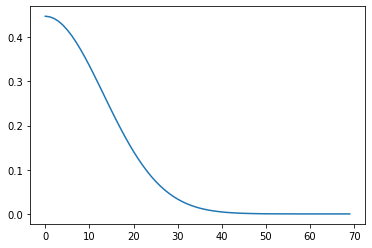

In [49]:
# random int print quality_1vs1
import random
import pandas as pd

df = pd.DataFrame(columns=['idx', 'result'])

for i in range(30,100,1):
    
    r1, r2 = Rating(30), Rating(i)  # assign Alice and Bob's ratings
    quality = round(quality_1vs1(r1,r2),4)
    rate = rate_1vs1(r1,r2)
    print(i, rate, quality)
    df.loc[len(df)]= [i,quality]

df['result'].plot()

In [14]:
r1 = Rating()
r2 = R

In [6]:
Rating??

Init signature: Rating(mu=None, sigma=None)
Source:        
class Rating(Gaussian):
    """Represents a player's skill as Gaussian distrubution.

    The default mu and sigma value follows the global environment's settings.
    If you don't want to use the global, use :meth:`TrueSkill.create_rating` to
    create the rating object.

    :param mu: the mean.
    :param sigma: the standard deviation.

    """

    def __init__(self, mu=None, sigma=None):
        if isinstance(mu, tuple):
            mu, sigma = mu
        elif isinstance(mu, Gaussian):
            mu, sigma = mu.mu, mu.sigma
        if mu is None:
            mu = global_env().mu
        if sigma is None:
            sigma = global_env().sigma
        super(Rating, self).__init__(mu, sigma)

    def __int__(self):
        return int(self.mu)

    def __long__(self):
        return long(self.mu)

    def __float__(self):
        return float(self.mu)

    def __iter__(self):
        return iter((self.mu, self.sigma))

   